In [ ]:
bayes factor is always better than pvalue
contrast hypothesis testing
taken from cs109 handout

cs109 handout from this book
https://chrispiech.github.io/probabilityForComputerScientists/en/examples/mixture_models/
    

<h6>Given a set of data, how to fit this? MLE and MAP estimation to fit data</h6>

<h6>Parameters distributions</h6> 
<table style="width:100%">

<tr>Bernoulli&nbsp $theta=p$</tr>
<tr>Poisson&nbsp $theta = lambda$</tr>
<tr>Normal&nbsp $theta= (mu,sigma^2) $</tr>
<tr>Uniform&nbsp $theta=(a,b)$</tr>
<tr>Linear Regression $Y=mX+b$&nbsp $theta=(m,b)$</tr>
</table>

<h6>MLE Normal</h6>
$$
L(\theta) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\theta_1}} e^{-\frac{(X_i-\theta_0)^2}{2\theta_1}}
$$
<p>
Converting from argmax $L(\theta)$ to $-argmin(log(L(\theta)))$
</p>

<p>
$$
-log(L(\theta)) = -(\sum_{i=1}^{n}log(2\pi\theta_1)^{-\frac{1}{2}}) - \sum_{i=1}^{n}log(e^{\frac{-(X_i-\theta_{0})^{2}}{2\theta_1}})
$$

$$
=\frac{1}{2}\sum_{1}^{n}(2\pi\theta_1) + \sum_{1}^{n}(\frac{(X_i-\theta_0)^2}{2\theta_1})
$$

$$
\frac{\partial(LL(\theta))}{\partial \theta_0} = \partial(\sum_{1}^{n}(\frac{(X_i-\theta_0)^2}{2\theta_1}))d\theta_0
$$

$$
0=\sum_{1}^{n}-2\frac{(X_i-\theta_0)}{2\theta_1}
$$

$$
\sum_1^n \theta_0 = \sum_1^n(X_i)
$$

$$
\theta_0 = \frac{1}{n}\sum_1^{n}(X_i) = \bar \mu
$$

$$
\frac{\partial(LL(\theta))}{\partial \theta_1} = \frac { \partial \frac{1}{2}(\sum_{1}^{n}(2\pi\theta_1))}{\partial \theta_1}  + \frac{\partial \sum_{1}^{n}(\frac{(X_i-\theta_0)^2}{2\theta_1})}{\partial \theta_1}
$$
$$
 0 = n\pi - \sum(X_i-\theta_0)^2\theta_1^{-2}
$$
$$
 n\pi \theta_1^{2} = \sum(X_i-\theta_0)^2
$$
$$
 \theta_1^{2} =\frac{1}{n\pi} \sum(X_i-\theta_0)^2
$$

</p>

 



<h6>MAP Normal</h6>
<p>
$$
MAP = argmax f(\theta | X_1,X_2,...X_n) = argmax\frac{f(X_1,X_2,...X_n|\theta)g(\theta)}{h(X_1,X_2,...X_n)}
$$
$$
 = argmax \frac{\sum_{i=1}^{n}f(X_i|\theta) g(\theta)}{h(X_1,X_2,...X_n)}
$$
<p>
h(X) is constant
</p>
$$
= argmax (g(\theta))\prod f(X_i|\theta)
$$
</p>
<p>take teh log to convert the products to sum</p>
I dont see a derivative. 

In [ ]:
https://math.mit.edu/~dav/05.dir/class15-prep.pdf
how to update postrior/prior based on new data points. 
how do we know if datapoint doesnt fit? outlier and we have teh wrong distribution? We sample from the posterior
and see if it fits. 
https://towardsdatascience.com/building-a-bayesian-logistic-regression-with-python-and-pymc3-4dd463bbb16

hamiltonian MCMC vs Metropolis hastings
https://www.youtube.com/watch?v=ZGtezhDaSpM
    
https://www.youtube.com/watch?v=RVWfbOHCalM&list=PLeB45KifGiuHesi4PALNZSYZFhViVGQJK&index=40a
   

<h6>MLE Poisson</h6>
The PMF for a discrete RV with Poisson distribution leads to the following likelihood function: 
$$
L(\theta) = \prod_{i=1}^{n}\frac{e^{-\lambda}}{X_{i}!}\lambda^{X_i}
$$
As an aside the difference between likelihood and PMF for a discrete RV and PDF for a continuous RV lies in the
notation. The above notation is incorrect but it confuses people if we use the correct notation. A likelihood is based observed data. We denote observstions as O as outcomes and theta as the set of parameters which specify the shape of the probabilty density or mass. $P(O|\theta)$ is the probability we observe otucomes O. When presented with data we don't know theta, we see O and if we are given theta we can calcualte the probability $P(O|\theta)$ by maximixing the $P(O|\theta)$ as function. Converting the Probability density or mass to a likelihood function gives: 
$$
L(\theta|O) = P(O | theta)
$$
The likelihood fn is conditioned on the observed data while the probability density or mass is conditoined on the parameters
of the distribution, theta. For the purposes of the derivative we leave out the O. 
<p>
Given the Likelihood, the MLE estimator is called theta-hat, where the hat notation is for an estimator. 
</p>
$$
\hat \theta = argmax L(\theta)
$$ 
<p>
We can transform a constant
or increasing PDF by taking the log and adding a negative sign to find a minimum instead of a maximum resulting
in a negative log likelihood estimator 
</p>
$$
NLL(\theta)=-LogLikelihood(\theta) = -argmin log(L(\theta))
$$
$$
-\frac{\partial LogLikelihood(\theta)}{\partial \theta} =  \partial \frac{-log \sum_{i=1}^{n}\frac{e^{-\lambda}}{X_{i}!}\lambda^{X_i}}{\partial \lambda}
$$
$$
=- \frac{ \partial (log \sum_{i=1}^{n}\frac{e^{-\lambda}}{X_{i}!}\lambda^{X_i})}{\partial \lambda}
$$
<p>

$$
=\frac{\partial \sum_{i=1}^{n}(log(e^{-\lambda}\lambda^{X_i})-log(X_i!))}{\partial \lambda}
$$

$$
= \frac{\partial \sum(log e^{-\lambda}+log\lambda^{X_i}-log(X_i!))}{\partial \lambda} 
$$

$$
= \frac{\partial (-n\lambda + \sum(X_ilog\lambda -log(X_i!)))}{\partial \lambda}
$$

$$
\frac{\partial (-n\lambda)}{\lambda} = n
$$

$$
\frac{\partial log\lambda \sum{X_i}}{\partial \lambda} = \frac{\sum{X_i}}{\lambda}
$$

$$
\frac{\partial \sum(log (-X_i!)}{\partial \lambda} = 0
$$

$$
0=-n + \frac{\sum^{n}(X_i)}{\lambda}
$$
$$
n\lambda = \sum^{n}(X_i)
$$
$$
\lambda = \frac{1}{n}\sum X_i   = \bar \mu                
$$
                    
</p>

In [ ]:
<h6>Chi square and poisson fitting</h6>
If events are occuring randomly and independently and the P(event) does not change over time or given interval of
time then we can assume Poisson. The RV X is the number of events in a fixed unit of time. Problem is there are always
external factors which bias this, weather, etc. PD,$\lambda=np$ approximates binomial distribution if n is large and p is small.
How large and how small? 

issues: https://www.youtube.com/user/jbstatistics/videos

Used for contingency tables and count data. This should be the first analysis method for categorical data. 
chi square goodness of fit is not good for small sample sizes, 
https://www.theanalysisfactor.com/regression-models-for-count-data/
https://stats.stackexchange.com/questions/78139/how-to-know-if-a-data-follows-a-poisson-distribution-in-r
Chi square only first test
Poisson regression for count data
https://stats.oarc.ucla.edu/r/dae/poisson-regression/#:~:text=Poisson%20regression%20%E2%80%93%20Poisson%20regression%20is,variance%20exceeds%20the%20conditional%20mean.
negative binomial regrssion for overdispersed count data
zero inflated regression model for zeros, combine models, one for 0s another for rest of data


In [ ]:
<p>Poisson Regression</p>
Fitting zero count data. https://www.youtube.com/watch?v=cD9V1ApYqCk which says if you have an AIC difference between 
    0 inflated and nonzero inflated more than 2 you use the one w lower AIC. 
zero inflated model. No way to do this in R? 
https://stats.oarc.ucla.edu/r/dae/zip/#:~:text=Zero%2Dinflated%20poisson%20regression%20is,zeros%20can%20be%20modeled%20independently.
    

In [ ]:
<h6>MAP Poisson </h6>
<p>The conjugate prior for a Poisson is </p>

In [ ]:
<h6>MLE Binomial</h6>

<p>
$$
P(X=x|n,p) = \binom{n_j}{n_i}p^x(1-p)^{n-x}
$$
</p>
<p>
Take partial WRT p, the parameters
</p>



<h6>MLE Multinomial</h6>
<p>
$$
P(x_1,x_2,...x_k|n,p_1,p_2,...p_k) = \frac{N!}{\prod_{i=1}^{x_i!}}p_{i}^{x_i},\ \sum_i x_i=N, x_i \ge > 0
$$
</p>

<p>
Beta Distribution, conjugate prior of Binomial
</p>
<p>
$$
p(p|\alpha, \beta) = \frac{1}{B(\alpha, \beta)} p^{\alpha-1}(1-p)^{\beta -1},\ p=[0,1]
$$
<p>Beta function</p>
$$
B(\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha),\Gamma(\beta)} \approx \binom{\alpha -1}{\alpha+ \beta-2}
$$
</p>
<p>
Dirichlet Distribution, conjugate prior of multinomial
</p>
<p>
$$
p(P={p_i}| \alpha_i)=\frac{\prod_i \Gamma(\alpha_i)}{\Gamma(\sum_i \alpha_i)}\prod p_i^{\alpha_i-1}
$$
$$
\sigma = \sum(\alpha_i) 
$$
$$
base=\frac{\alpha_i}{\sigma}
$$


</p>

In [ ]:
https://www.cs.cmu.edu/~epxing/Class/10701-08s/recitation/dirichlet.pdf

<h6>MLE Bernoulli</h6>
<p>$L(\theta)=\prod_{i=1}^{n} p^{X_i}(1-p)^{1-{X_i}}$</p>
<p>convert liklihood to negative log liklihood</p>
<p>$-LogLikelihood(\theta)=-\sum_{i=1}^{n} log(p^{X_i}(1-p)^{1-{X_i}})$</p>
<p>=$\sum_{i=1}^{n}X_i(log(p))+(1-X_i)log(1-p)$</p>
<p>=$Ylog(p) + (n-Y)log(1-p)$</p>
<p>where $Y=\sum_i^n(X_i)$</p>
<p>To find the maximum take the derivative WRT theta and set to 0. Solve for X_i</p>
<p>$\frac{\partial LogLikelihood(\theta)}{\partial \theta} = 
\frac{\partial LogLikelihood(p)}{\partial p}=
\frac{\partial(Ylog(p) + (n-Y)log(1-p))}{\partial (p)} $</p>
<p>$\frac{\partial log(p)}{\partial (p)} = \frac{1}{p}dp$</p>
<p>$\frac{\partial(Ylog(p) + (n-Y)log(1-p))}{\partial (p)}= \frac{Y}{p}dp - \frac{n-Y}{1-p}dp = 0$</p>
<p>$ \frac{Y}{p} = \frac{n-Y}{1-p}$</p>
<p>$ (Y)(1-p) = (n-Y)(p)$</p>
<p>$ Y-Yp = np-Yp$</p>
<p>$ Y = np$</p>
<p>$ \frac{Y}{n} = p$</p>
<p>After replacing the summation for Y we see the p is the mean of $X_i$</p>






<p>What is the MLE for $\theta$ for a coin where our $X_i=(0,1,1,0,0)?$</p>
<p>$L(\theta)=\prod_{i=1}^{n} p^{X_i}(1-p)^{1-{X_i}}$</p>
<p>There are 3 0 and 2 1 values </p>
<p>$L(\theta) = \theta^2(1-\theta)^3$</p>
<p>taking derivateive WRT theta and set to 0 to solve for theta gets us....</p>
<p>$\frac{\partial L(\theta)  }{\partial \theta} = 2 \theta(1-theta)^3 + \theta^2(3)(1-\theta)^2(-1)$</p>
<p>$0=2\theta(1-\theta)^3-3\theta^2(1-\theta)^2$<\p>
<p>$0=2(1-\theta)-3\theta$</p>
<p>$0=2-2\theta-3\theta$</p>
<p>$0=2-5\theta$</p>
<p>$\theta=\frac{2}{5}$</p>


In [18]:
#pytorch derivatives
import torch
x = torch.tensor(3.0, requires_grad=True)
y=3*x**2
y.backward()
print("derivative is: ",x.grad)
#derivative with multiple values,

x=torch.linspace(-20,20,20, requires_grad=True)
Y=x**2
y=torch.sum(Y) #dont understand how this is multiple values? he means multiple values of x, bc it is a linspace
y.backward()
print(x.grad) #OK , where is the connection to sum?? and having x be a vector or np array?

derivative is:  tensor(18.)
tensor([-40.0000, -35.7895, -31.5789, -27.3684, -23.1579, -18.9474, -14.7368,
        -10.5263,  -6.3158,  -2.1053,   2.1053,   6.3158,  10.5263,  14.7368,
         18.9474,  23.1579,  27.3684,  31.5789,  35.7895,  40.0000])


In [ ]:
#calculate derivative and set to 0
#https://gist.github.com/papachristoumarios/3da173eba99ea9716ccf13f71a36ae91
#https://www.cs.toronto.edu/~guerzhoy/411_2018/lec/week4/pytorch_tutorial/MaxLik/Maximum+Likelihood+for+Bernoulli+with+PyTorch.html

$-\sum(log x*(p)+(1-x)(1-p))$

In [14]:
import torch,numpy as np
from torch.autograd import Variable

X_i = np.array([0.,1.,1.,0.,0.])
x = Variable(torch.from_numpy(X_i)).type(torch.FloatTensor)
p = Variable(torch.rand(1),requires_grad=True)

learning_rate = .001
for a in range(100):
    #why minus and formuls different. 
    like = -torch.sum(torch.log(x*p+(1-x)*(1-p)))
    
    like.backward()
    if a%10==0:
        print("L(theta):",like.data.numpy(), "p=",p.data.numpy(), "dL/dp:",p.grad.data.numpy())
    p.data -= learning_rate * p.grad.data
    p.grad.data.zero_()
#we are converged to .40 or 2/5 at 40 iterations




L(theta): 10.184544 p= [0.9656638] dL/dp: [85.30021]
L(theta): 4.7447004 p= [0.7511166] dL/dp: [9.391133]
L(theta): 4.150029 p= [0.6737441] dL/dp: [6.2267494]
L(theta): 3.855351 p= [0.61925465] dL/dp: [4.649593]
L(theta): 3.683202 p= [0.57761294] dL/dp: [3.639964]
L(theta): 3.57528 p= [0.5446463] dL/dp: [2.9161777]
L(theta): 3.5051827 p= [0.5180802] dL/dp: [2.364695]
L(theta): 3.4588044 p= [0.496472] dL/dp: [1.9295359]
L(theta): 3.4278312 p= [0.47881407] dL/dp: [1.5791163]
L(theta): 3.4070625 p= [0.46435478] dL/dp: [1.2936702]


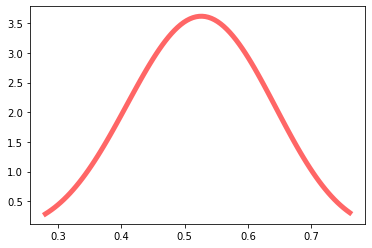

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import beta
import numpy as np
#11 heads and 10 tails
a, b = 11.0, 10.0
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

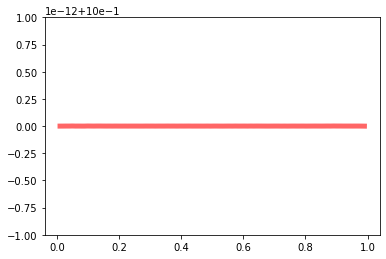

In [10]:
#1 head and 1 tails, there are some undefined areas like a,b=(1,0). Large numbers or more flips changes the shape
a, b = 1.0, 1.0
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

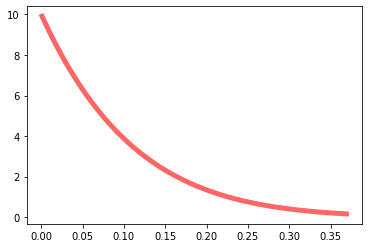

In [11]:
#1 head and 10 tails, an unfair coin
a, b = 1.0, 10.0
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

In [ ]:
https://courses.cs.washington.edu/courses/cse312/20su/files/student_drive/7.5.pdf
https://online.stat.psu.edu/stat504/lesson/1/1.5
    
    

In [ ]:
<p>From Bayes:$\pi_{\Theta}(\theta | x )= \frac{L(x|\theta)\pi_\Theta(\theta)}{\mathbb{P(x)}} \propto L(x|\theta)\pi_{\Theta}(\theta) $</p>
<p>Most derivations drop the denominator, is this a constant? </p>


$\hat \theta _{MAP} = \underset{\theta}{argmax}\  \pi_{\theta}(\theta | x) = \underset{\theta}{argmax}\  L(x | \theta) \pi_{\Theta}(\theta) $